In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.ticker as ticker
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from sklearn import metrics

In [7]:
df = pd.read_csv('modified_BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [8]:
df.shape

(10127, 21)

In [9]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [10]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [12]:
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [13]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [14]:
df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [15]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [16]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [17]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [18]:
df['Customer_Age'].value_counts()

44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
70      1
73      1
Name: Customer_Age, dtype: int64

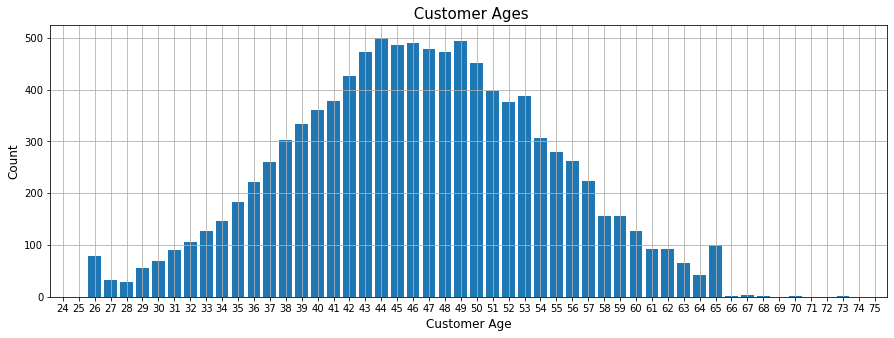

In [19]:
value_counts = df['Customer_Age'].value_counts()
plt.figure(figsize=(15, 5))
plt.bar(value_counts.index, value_counts.values)
plt.title(' Customer Ages', fontsize=15)
plt.xlabel('Customer Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

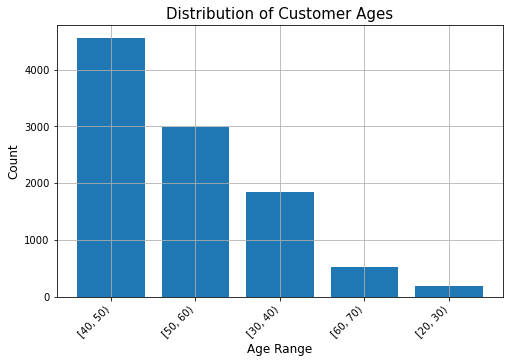

In [20]:
bins = [20, 30, 40, 50, 60, 70]
df['Age Range'] = pd.cut(df['Customer_Age'], bins=bins, right=False)
value_counts = df['Age Range'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(value_counts.index.astype(str), value_counts.values)
plt.title('Distribution of Customer Ages', fontsize=15)
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.show()

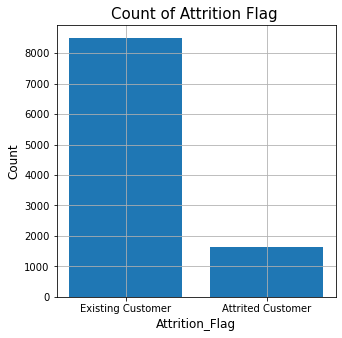

In [21]:
value_counts = df['Attrition_Flag'].value_counts()
plt.figure(figsize=(5, 5))
plt.bar(value_counts.index, value_counts.values)
plt.title('Count of Attrition Flag ', fontsize=15)
plt.xlabel('Attrition_Flag', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

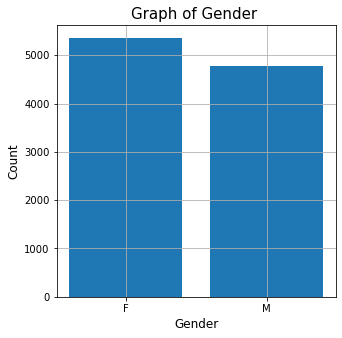

In [22]:
value_counts = df['Gender'].value_counts()
plt.figure(figsize=(5, 5))
plt.bar(value_counts.index, value_counts.values)
plt.title('Graph of Gender ', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

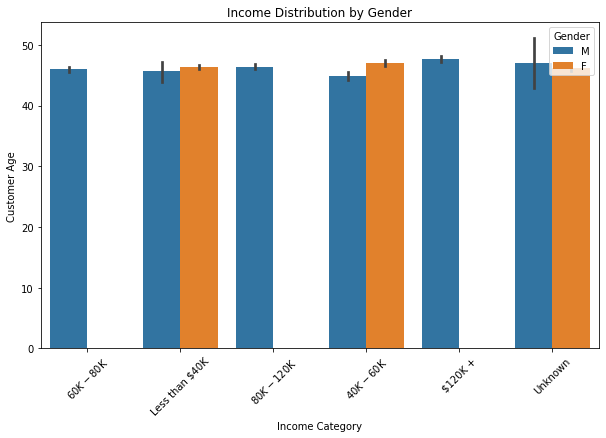

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Income_Category', y='Customer_Age', hue='Gender', data=df)
plt.title("Income Distribution by Gender")
plt.xlabel("Income Category")
plt.ylabel("Customer Age")
plt.xticks(rotation=45)
plt.legend(title="Gender", loc="upper right")
plt.show()

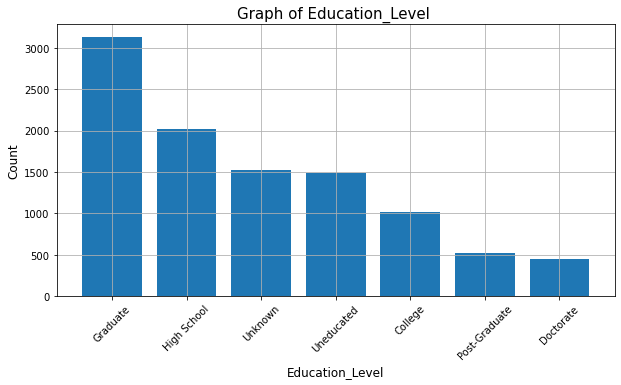

In [24]:
value_counts = df['Education_Level'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(value_counts.index, value_counts.values)
plt.title('Graph of Education_Level ', fontsize=15)
plt.xlabel('Education_Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xticks(rotation=45)
plt.show()

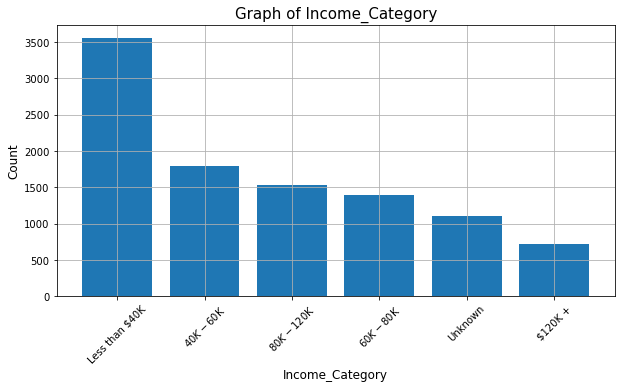

In [25]:
value_counts = df['Income_Category'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(value_counts.index, value_counts.values)
plt.title('Graph of Income_Category', fontsize=15)
plt.xlabel('Income_Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xticks(rotation=45)
plt.show()

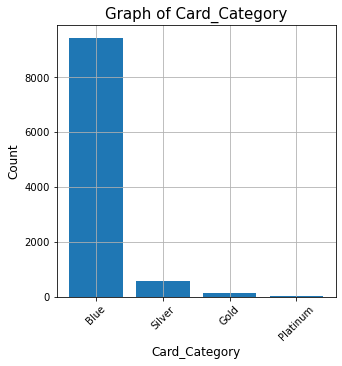

In [26]:
value_counts = df['Card_Category'].value_counts()
plt.figure(figsize=(5, 5))
plt.bar(value_counts.index, value_counts.values)
plt.title('Graph of Card_Category', fontsize=15)
plt.xlabel('Card_Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xticks(rotation=45)
plt.show()

In [27]:
Target = 'Attrition_Flag'
print('Target: ', Target)

Target:  Attrition_Flag


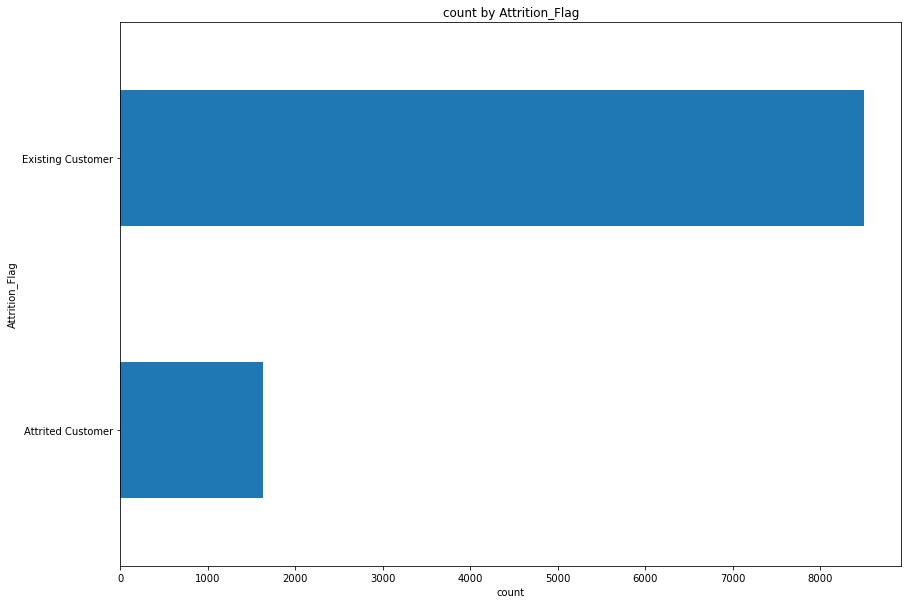

In [28]:
plt.figure(figsize=(14,10))
plt.title('count by Attrition_Flag')
plt.ylabel('Attrition_Flag Type')
plt.xlabel('count')
df.groupby([df['Attrition_Flag']]).size().sort_values(ascending=True).plot(kind='barh')
plt.show()

In [29]:
Classes = df['Attrition_Flag'].unique()
Classes

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [30]:
df['Attrition_Flag']=pd.factorize(df["Attrition_Flag"])[0]
#df['Subgroup'] = pd.factorize(df["Subgroup"])[0]
print(df['Attrition_Flag'].dtype)
df['Attrition_Flag'].head()

int64


0    0
1    0
2    0
3    0
4    0
Name: Attrition_Flag, dtype: int64

In [37]:
# Fill missing values with zeros
df_filled = df.fillna(0)

# Or fill missing values with the mean of the column
# df_filled = df.fillna(df.mean())

# Compute correlation matrix
cor = df_filled.corr()

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


TypeError: Cannot setitem on a Categorical with a new category (0), set the categories first

In [32]:
cor_target = abs(cor['Attrition_Flag'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

Attrition_Flag           1.000000
Contacts_Count_12_mon    0.204491
Total_Revolving_Bal      0.263053
Total_Trans_Ct           0.371403
Total_Ct_Chng_Q4_Q1      0.290054
Name: Attrition_Flag, dtype: float64

In [33]:
# df['Contacts_Count_12_mon'] = pd.to_numeric(df['Contacts_Count_12_mon'], errors='coerce')
# print(df['Contacts_Count_12_mon'].dtype)

In [34]:
Features = ["Contacts_Count_12_mon","Total_Revolving_Bal","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1"]
print('Full Features: ', Features)

Full Features:  ['Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']


In [35]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Rest of your code
# x1, y1, x2, y2 = train_test_split(df[Features], df[Target], test_size=0.2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(df[Features], df[Target], test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
result = clf.predict(X_test)

ac_s
c = accuracy_score(Y_test, result)
rc_sc = recall_score(Y_test, result, average="weighted")
pr_sc = precision_score(Y_test, result, average="weighted")
f1_sc = f1_score(Y_test, result, average='micro')
confusion_m = confusion_matrix(Y_test, result)

print("========== Decision Tree ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)



NameError: name 'ac_s' is not defined

In [ ]:

classifier = GaussianNB()
classifier.fit(X_train, Y_train)
result = classifier.predict(X_test)

ac_sc = accuracy_score(Y_test, result)
rc_sc = recall_score(Y_test, result, average="weighted")
pr_sc = precision_score(Y_test, result, average="weighted")
f1_sc = f1_score(Y_test, result, average='micro')
confusion_m = confusion_matrix(Y_test, result)

print("========== Naive Bayes Classifier ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)


In [36]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(Y_test, result ) 

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, result)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


In [ ]:
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')